In [2]:
import keras
import pandas as pd
import numpy as np 
import matplotlib as plt

# Here, we can import our data

In [3]:
#dataIN = pd.read_excel('/home/max/resd_data.xlsx')
dataIN = pd.read_excel('/Volumes/Library/Download Bin/resd_data.xlsx')

# Next, data is formatted to proper tensors
## We need train and test data, as well as train and test labels
## Size and dimensions must always agree. Labels should be (1xLength)

In [4]:
#filling (Nan -> 0)
data = dataIN.fillna(0)

#slicing
total_input = np.array([[data.SquareFootageStructure],[data.LotSquareFootage],[data.YearBuilt],[data.Bedrooms],[data.BathsTotal],[data.field_StoriesTotal],[data.field_PostalCode]])
total_label = np.array([data.ListPrice])

#dicing 
train_input = total_input[:,0,0:9000]
test_input = total_input[:,0,9000:9999]
train_label = total_label[:,0:9000]
test_label = total_label[:,9000:9999]

#rotation
train_data = np.transpose(train_input)
test_data = np.transpose(test_input)
train_targets = np.transpose(train_label)
test_targets = np.transpose(test_label)

#verification 
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

train_max = train_targets.max()
train_targets = train_targets / train_max

test_max = test_targets.max()
test_targets = test_targets / test_max

(9000, 7)
(999, 7)
(9000, 1)
(999, 1)


# Build the model here
## Layers are chosen within the function
## This model follows that in the book, Page 86

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                            input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# The model is fit in this section
## K-fold validation is applied, by following the book's example

In [12]:
Verbose_setting = 1
k=3
num_val_samples = len(train_data) // k
num_epochs = 8 #100
all_scores = []
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=Verbose_setting)
    all_scores.append(val_mae)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

('processing fold #', 0)
Train on 6000 samples, validate on 3000 samples
Epoch 1/8
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0255 - val_loss: 0.0017 - val_mean_absolute_error: 0.016842 - mean_absolute_error: 
Epoch 2/8
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0015 - mean_absolute_error: 0.0159 - val_loss: 0.0011 - val_mean_absolute_error: 0.0150
Epoch 3/8
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0143 - val_loss: 0.0011 - val_mean_absolute_error: 0.0143
Epoch 4/8
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0143 - val_loss: 0.0011 - val_mean_absolute_error: 0.0182
Epoch 5/8
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0141 - val_loss: 8.4626e-04 - val_mean_absolute_error: 0.0125
Epoch 6/8
6000/6000 [==============================] - 14s 2ms/step

# Verification of scores, as done in book

In [6]:
all_scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[0.019907811715368654,
 0.017191695367380612,
 0.014520859781420262,
 0.013381220559093184,
 0.014266157041184165,
 0.013842607042400534,
 0.013775956166559706,
 0.013622789160391321]

# Visualize how the score changes by epoch

In [14]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

NameError: name 'average_mae_history' is not defined

# Compare test and training data visually
## Select a slice of both the input data and the input label
## Create a prediction vector using the stored model
## Plot the prediction model with the input labels
## The closer the lines overlap, the better the prediction 

(0, 6211467.3703125)

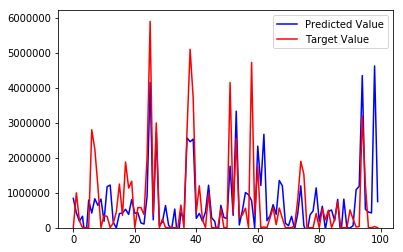

In [15]:
#Discrete Value Input
x=[[4000],[6000],[1995],[4],[4],[1],[90069]]
#x=[[1549],[5825],[1974],[3],[2],[1],[92624]]
x = np.transpose(x)

#Selected Range Input
A=1000
B=1100 
C = B - A
x = train_data[A:B,:]
y = train_targets[A:B]
#test_targets 
y_pred = model.predict(x)
y_label = np.transpose(train_label)[A:B]
#plt.plot(t, a, 'r') # plotting t, a separately 
#plt.plot(t, b, 'b') # plotting t, b separately 


plt.plot(y_pred*train_max,'b',label='Predicted Value')
plt.plot(y*train_max,'r',label='Target Value')
#plt.plot(y_label,'g',label='Raw House Target Value')
plt.legend()
plt.ylim(bottom=0)

# Observe entire prediction of test data

In [13]:
price = model.predict(test_data)
price = price * train_max
y_act = np.transpose(test_label)

plt.plot(y_act,'c',label='Actual Value')
plt.plot(price,label='Predicted Value')
plt.xlabel('Entry')
plt.ylabel('Cost')
plt.legend()
plt.ylim(bottom=0)
plt.ylim(top=5e6)

AttributeError: 'module' object has no attribute 'plot'

# Prehaps a new model can be applied
## In the next notebook, data is pre-restricted